In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GomokuTools2 import GomokuTools, NH9x9, Heuristics
from GomokuBoard import GomokuBoard
from FastGomokuBoard import FastGomokuBoard
from HeuristicScore import HeuristicScore

In [3]:
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21

TypeError: get_line() takes exactly 2 arguments (3 given)

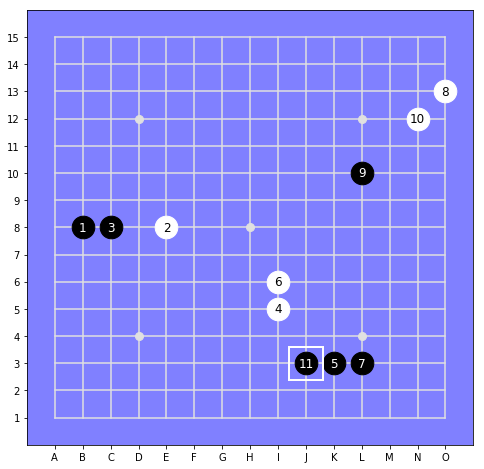

In [4]:
board=GomokuBoard(15, 8)
board.set(B,8).set(E,8).set(C,8)
board.set(I,5).set(K,3).set(I,6).set(L,3)
board.set(O,13).set(L, 10).set(N,12).set(J,3)
board.display(score=1)

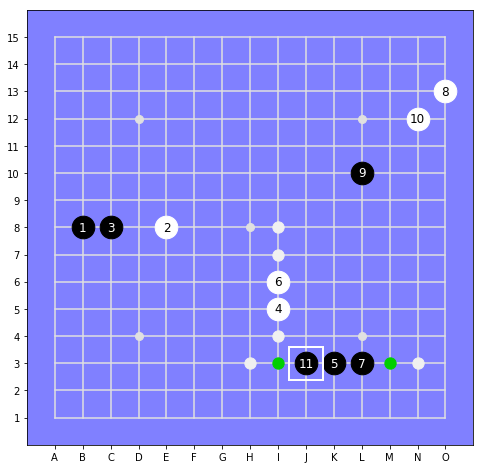

In [167]:
fboard=FastGomokuBoard(15, 8)
fboard.set(B,8).set(E,8).set(C,8)
fboard.set(I,5).set(K,3).set(I,6).set(L,3)
fboard.set(O,13).set(L, 10).set(N,12).set(J,3).display(score=0)

In [168]:
b = fboard
nh = b.getn9x9(M, 11)
nh

|                 |
|              +  |
|            o    |
|          o      |
|        *     +  |
|      x          |
|                 |
|              +  |
|                 |

In [169]:
edges = fboard.all_edges(M,11)
edges

[(None, 6), (None, 6), (None, None), (1, None)]

In [170]:
h = Heuristics()
h.classify_nh(nh, edges)

[(1, 0, 6), (0, 0, 6)]

In [171]:
nh.get_line('ne')

[[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0]]

In [172]:
nh.visible

[4096, 3072, 1073742338]

In [173]:
def get_line(self, direction, color=0):
    """
    Return two arrays of 8 integers representing black and white stones on a line
    of length 9. The middle position is not represented in the array
    Args:
        direction: either one of 'e', 'ne', 'n', 'nw' or their integer representations
    """
    d = GomokuTools.dirs()[direction][0] if type(direction) == str else direction
    return [ GomokuTools.as_bit_array(
        (self.visible[c] & (0xFF << (8 * d))) >> (8 * d)) 
            for c in [color, 1-color, 2]]


In [174]:
d=1
(np.array(nh.visible) & (0xFF << (8 * d))) >> (8 * d) 

array([16, 12,  2], dtype=int32)

In [175]:
[b.board[i][4][12] for i in range(3)]

[4096, 3072, 1073742338]

In [176]:
defensive = b.board[1] | b.board[2]

In [177]:
b2 = [b.board[0], defensive]
np.shape(b2)

(2, 15, 15)

In [178]:
black,white = np.rollaxis(np.array(b2), 0, 3)[4][12]
black, white

(4096, 1073745410)

In [179]:
NH9x9(black, white)

|                 |
|              o  |
|            o    |
|          o      |
|        *     o  |
|      x          |
|                 |
|              o  |
|                 |

In [180]:
def line_bytes(b, viewpoint):

    # 'Or' the boarder to the defensive stones: shape=(2,N,N)
    b2 = np.array([b.board[viewpoint], b.board[1-viewpoint] | b.board[2]])

    # extract the line bytes for all shape=(4,2,N,N)
    lines = np.array([((b2 & (0xFF << (8 * d))) >> (8 * d)) 
                      for d in range(4)])

    # roll the two axes for the 4 directions and two colors 
    # into the trailing positions: shape=(N,N,4,2)
    return np.rollaxis(np.rollaxis(lines, 0, 4), 0, 4)
    
BLACK = 0
%time lbs = line_bytes(b, BLACK)
lbs.shape, lbs[4][12]

CPU times: user 178 µs, sys: 42 µs, total: 220 µs
Wall time: 188 µs


((15, 15, 4, 2), array([[ 0,  2],
        [16, 14],
        [ 0,  0],
        [ 0, 64]]))

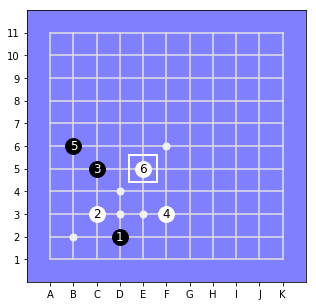

In [181]:
b=FastGomokuBoard(11, 5)
b.set(D,2).set(C,3).set(C,5).set(F,3).set(B,6).set(E,5).display(score=0)

In [185]:
nh = b.getn9x9(B, 4)
nh

|                 |
|                 |
|    +   x        |
|          x      |
|    +   *        |
|          o      |
|    +       x    |
|                 |
|        +       +|

In [207]:
l3 = nh.get_line(3)
l3

[[0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0]]

In [204]:
b.all_edges(B,4)

[(2, None), (2, None), (0, None), (0, 5)]

In [205]:
h=Heuristics()
h.f_range(l3, edges=b.all_edges(B,4)[3])

array([0])

In [209]:
[h.f_range(nh.get_line(d), edges=b.all_edges(B,4)[d]) for d in range(4)]

[array([0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0]),
 array([0])]

In [213]:
ne = np.array(nh.get_line(3))
ne[0], ne[1] | ne[2]  

(array([0, 0, 1, 0, 0, 0, 0, 0]), array([1, 0, 0, 1, 0, 1, 0, 0]))

In [234]:
lbs = line_bytes(b, BLACK)[7][1] # (7,1)=b2m(B,4)
lbs

array([[  0,  32],
       [  8,  32],
       [  4, 128],
       [ 32, 148]])

In [235]:
[h.f_range(NH9x9(*lbs[d]).get_line(0)) for d in range(4)]

[array([0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0]),
 array([0])]

In [240]:
NH9x9(*lbs[3]).get_line(0)

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [264]:
stones=np.array([[32], [148]])

In [265]:
indices = 128>>np.arange(8)
indicators = ((stones & indices) > 0) + 0
indicators

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0]])

In [266]:
ranges = [0x80, 0xC0, 0xE0, 0xF0, 0x0F, 0x07, 0x03, 0x01]

In [269]:
masks = (indicators[1] * ranges)
masks

array([128,   0,   0, 240,   0,   7,   0,   0])

In [300]:
offensive = np.array([66, 48, 128, 135])
defensive = np.array([129, 131, 66, 36])

In [335]:
def mask(offensive, defensive):
    n = defensive
    l = n & 0xF0
    l = (l | l<<1 | l<<2 | l<<3) & 0xF0

    r = n & 0x0F
    r = (r | r>>1 | r>>2 | r>>3) & 0x0F

    mask=(~(l | r))
    free_stones=mask & offensive
    free_length=np.sum([(mask>>i)&1 for i in range(8)], axis=0)
    return zip(free_stones, free_length)

In [336]:
mask(offensive, defensive)

[(66, 6), (48, 5), (0, 4), (0, 2)]